## Phase 2 (Data Understanding): Boxplots

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 2](https://data-science.training/kapitel-2/)
* Datum: 23.03.2023

Mit Hilfe von Boxplots analysieren wir die numerischen (kardinalskalierten) Attribute Fare und Age - und zwar getrennt für die Trainings- und Testdaten sowie für die zusammengeführten Daten. Da die Boxplots nicht mit fehlenden Daten umgehen können und beide Attribute solche fehlenden Daten haben, müssen wir diese vorher "behandeln". Wir entfernen diese fehlenden Werte der Einfachheit halber.

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt

In [5]:
# Trainings- und Testdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')
df_test  = pd.read_csv('../../data/titanic/original/test.csv')

In [6]:
# Daten zusammenführen
#  (KNIME "Concatenate")
df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
# Datentypen automatisch konvertieren
df_train = df_train.convert_dtypes()
df_test  = df_test.convert_dtypes()
df       = df.convert_dtypes()

In [8]:
# Fehlenden Werte behandeln: Datensätze löschen
#
# Fare
fare_train = df_train['Fare'].dropna()
fare_test  = df_test ['Fare'].dropna()
fare       = df      ['Fare'].dropna()
#
# Age
age_train  = df_train['Age'].dropna()
age_test   = df_test ['Age'].dropna()
age        = df      ['Age'].dropna()

In [9]:
# Quartile berechnen und ausgeben
def dst_quartiles(arr):
    print('Q0 [  0%%]: %8.4f' % np.quantile(arr, 0.00)) 
    print('Q1 [ 25%%]: %8.4f' % np.quantile(arr, 0.25)) 
    print('Q2 [ 50%%]: %8.4f' % np.quantile(arr, 0.50)) 
    print('Q3 [ 75%%]: %8.4f' % np.quantile(arr, 0.75)) 
    print('Q4 [100%%]: %8.4f' % np.quantile(arr, 1.00))

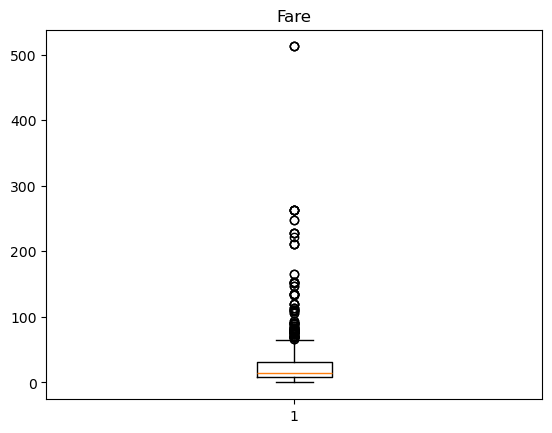

In [10]:
# Einfacher Boxplot für das Attribut Fare
plt.subplot()
plt.title('Fare')
plt.boxplot(fare_train)
plt.show()

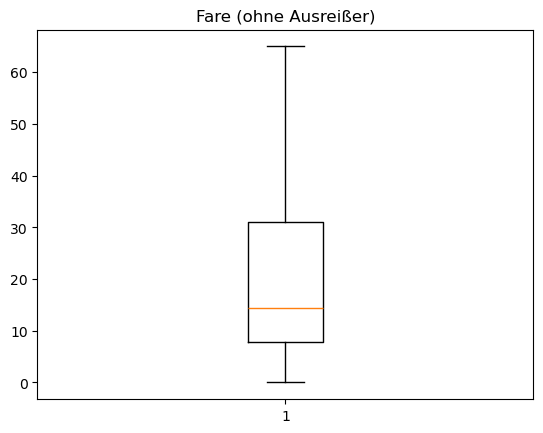

In [11]:
# Boxplot für das Attribut Fare (ohne Ausreißer)
plt.subplot()
plt.title('Fare (ohne Ausreißer)')
plt.boxplot(fare_train, showfliers=False)
plt.show()

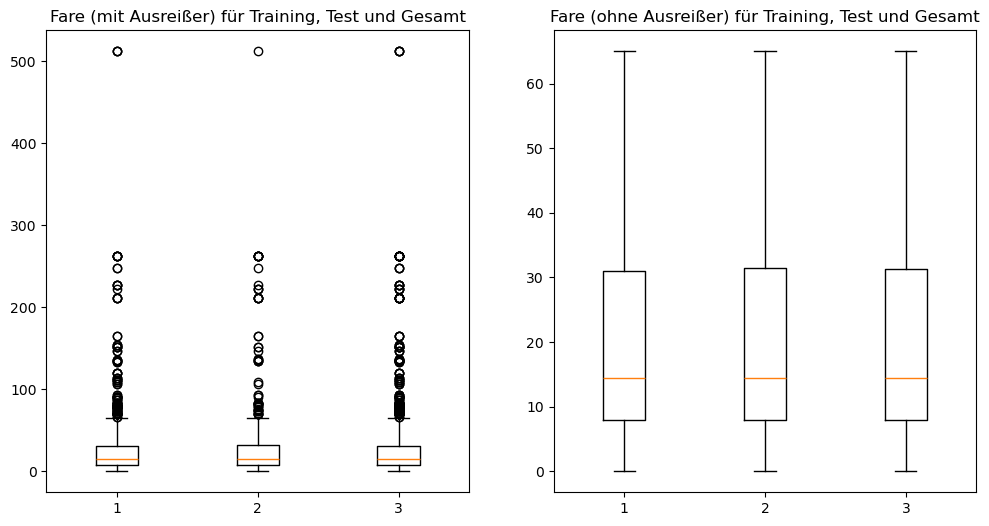

In [12]:
# Boxplots für das Attribut Fare für Training, Test und Gesamt
plt.figure(figsize=(12,6)) 
#
plt.subplot(121)
plt.title('Fare (mit Ausreißer) für Training, Test und Gesamt')
plt.boxplot([fare_train, fare_test, fare])
#
plt.subplot(122)
plt.title('Fare (ohne Ausreißer) für Training, Test und Gesamt')
plt.boxplot([fare_train, fare_test, fare], showfliers=False)
#
plt.show()
#
# Grafik speichern
#plt.savefig('../../figures/svg/Box_Fare.svg', format='svg', dpi=1200, transparent=True)

In [13]:
# Quartile berechnen und ausgeben
print('Training')
dst_quartiles(fare_train)
print('Test')
dst_quartiles(fare_test)
print('Gesamt')
dst_quartiles(fare)

Training
Q0 [  0%]:   0.0000
Q1 [ 25%]:   7.9104
Q2 [ 50%]:  14.4542
Q3 [ 75%]:  31.0000
Q4 [100%]: 512.3292
Test
Q0 [  0%]:   0.0000
Q1 [ 25%]:   7.8958
Q2 [ 50%]:  14.4542
Q3 [ 75%]:  31.5000
Q4 [100%]: 512.3292
Gesamt
Q0 [  0%]:   0.0000
Q1 [ 25%]:   7.8958
Q2 [ 50%]:  14.4542
Q3 [ 75%]:  31.2750
Q4 [100%]: 512.3292


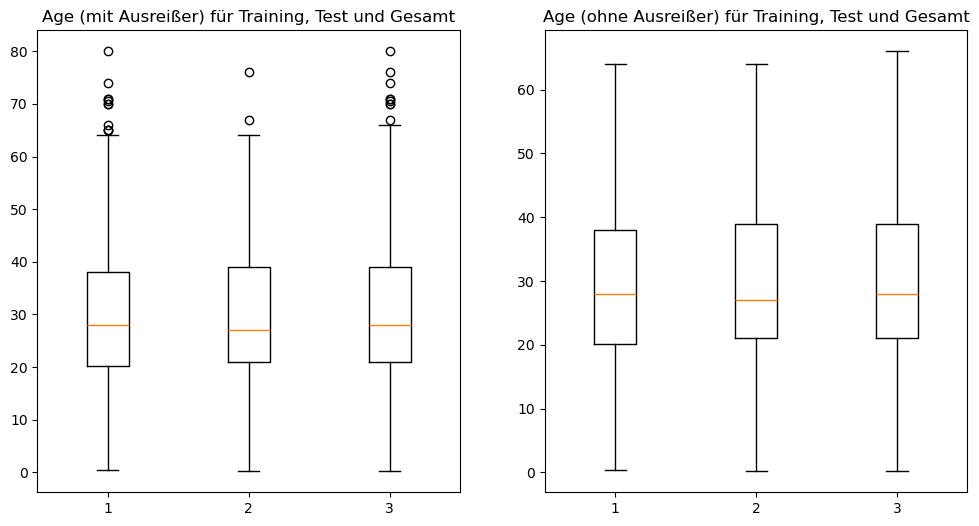

In [14]:
# Boxplots für das Attribut Age für Training, Test und Gesamt
plt.figure(figsize=(12,6)) 
#
plt.subplot(121)
plt.title('Age (mit Ausreißer) für Training, Test und Gesamt')
plt.boxplot([age_train, age_test, age])
#
plt.subplot(122)
plt.title('Age (ohne Ausreißer) für Training, Test und Gesamt')
plt.boxplot([age_train, age_test, age], showfliers=False)
#
plt.show()
#
# Grafik speichern
#plt.savefig('../../figures/svg/Box_Age.svg', format='svg', dpi=1200, transparent=True)

In [15]:
# Quartile berechnen und ausgeben
print('Training')
dst_quartiles(age_train)
print('Test')
dst_quartiles(age_test)
print('Gesamt')
dst_quartiles(age)

Training
Q0 [  0%]:   0.4200
Q1 [ 25%]:  20.1250
Q2 [ 50%]:  28.0000
Q3 [ 75%]:  38.0000
Q4 [100%]:  80.0000
Test
Q0 [  0%]:   0.1700
Q1 [ 25%]:  21.0000
Q2 [ 50%]:  27.0000
Q3 [ 75%]:  39.0000
Q4 [100%]:  76.0000
Gesamt
Q0 [  0%]:   0.1700
Q1 [ 25%]:  21.0000
Q2 [ 50%]:  28.0000
Q3 [ 75%]:  39.0000
Q4 [100%]:  80.0000


### Ergebnisse

50% der Passagiere waren zwischen 21 und 39 Jahre alt. Der Median beträgt 28 Jahre.

50% der Passagiere zahlten einen Ticketpreis zwischen ca. 8 und 31 Pfund. Der Median beträgt ca. 14,5 Pfund.